In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2

from camera_calibration import read_calibration, undistort_image
from color_and_gradient import pipeline
from warp_perspective import calibrate_warp, read_warp, warp_image

import sys
sys.path.append('../')
from utils.plot_utils import plt_imlist

from moviepy.editor import VideoFileClip

In [2]:
straight_images = glob.glob("test_images/straight_lines*.jpg")
int_params = read_calibration("intrinsics.p")

## Tune source and destination ROI manually

In [3]:
'''
test_img = mpimg.imread(straight_images[0])
h, w = test_img.shape[:2]
src = np.int32([[w/6 + 35, h], [w*5/6 + 23, h], 
                [w/2 + 66, h/2 + 100], [w/2 - 48, h/2 + 100]])
dst = np.int32([[w/5, h], [w*4/5, h], 
                [w*4/5, 0], [w/5, 0]])
print(src)
print(dst)
'''

'\ntest_img = mpimg.imread(straight_images[0])\nh, w = test_img.shape[:2]\nsrc = np.int32([[w/6 + 35, h], [w*5/6 + 23, h], \n                [w/2 + 66, h/2 + 100], [w/2 - 48, h/2 + 100]])\ndst = np.int32([[w/5, h], [w*4/5, h], \n                [w*4/5, 0], [w/5, 0]])\nprint(src)\nprint(dst)\n'

In [4]:
#src = [[248, 720], [1089, 720], [706, 460], [592, 460]]
src = [[300, 680], [1025, 680], [706, 460], [592, 460]]
dst = [[256, 720], [1024, 720], [1024, 0], [256, 0]]

In [5]:
M = calibrate_warp("perspective.p", src=src, dst=dst)
#M = read_warp("perspective.p")
print(M)

[[-6.60051567e-01 -1.48711618e+00  1.04974201e+03]
 [ 0.00000000e+00 -2.03922181e+00  9.38042035e+02]
 [ 0.00000000e+00 -2.38690523e-03  1.00000000e+00]]


## Test result on straight lines

<Figure size 432x288 with 0 Axes>

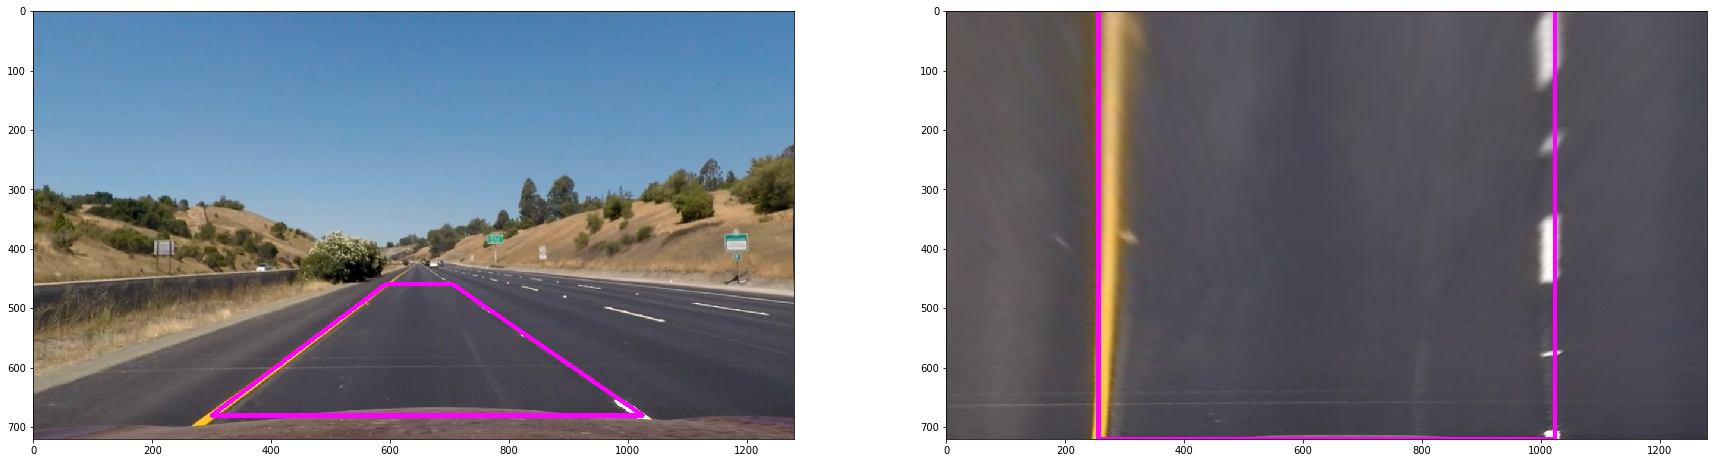

<Figure size 2160x1080 with 0 Axes>

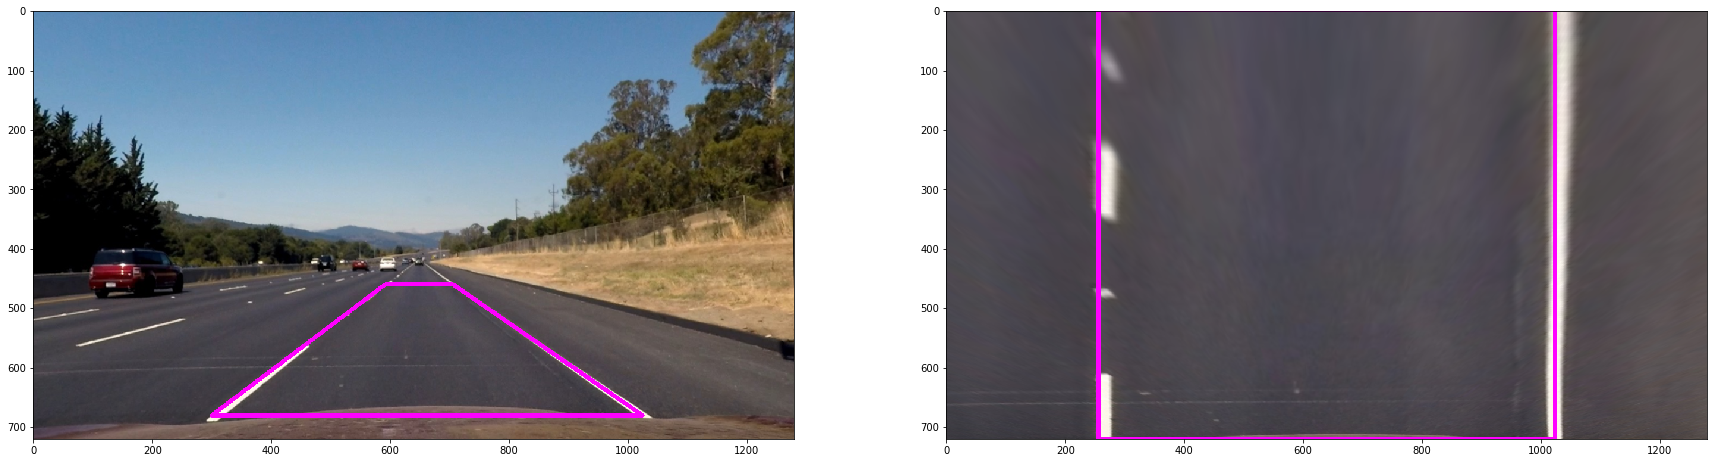

In [6]:
for image in straight_images:
    img = mpimg.imread(image)
    img_size = (img.shape[1], img.shape[0])
    img_rect = undistort_image(img, int_params)
    img_warped = cv2.warpPerspective(img_rect, M, img_size, flags=cv2.INTER_LINEAR)
    cv2.polylines(img_rect, np.array([src]), True, (255,0,255), 5)
    cv2.polylines(img_warped, np.array([dst]), True, (255,0,255), 5)
    plt_imlist([img_rect, img_warped])
    

## Test on all test images with thresholding

<Figure size 2160x1080 with 0 Axes>

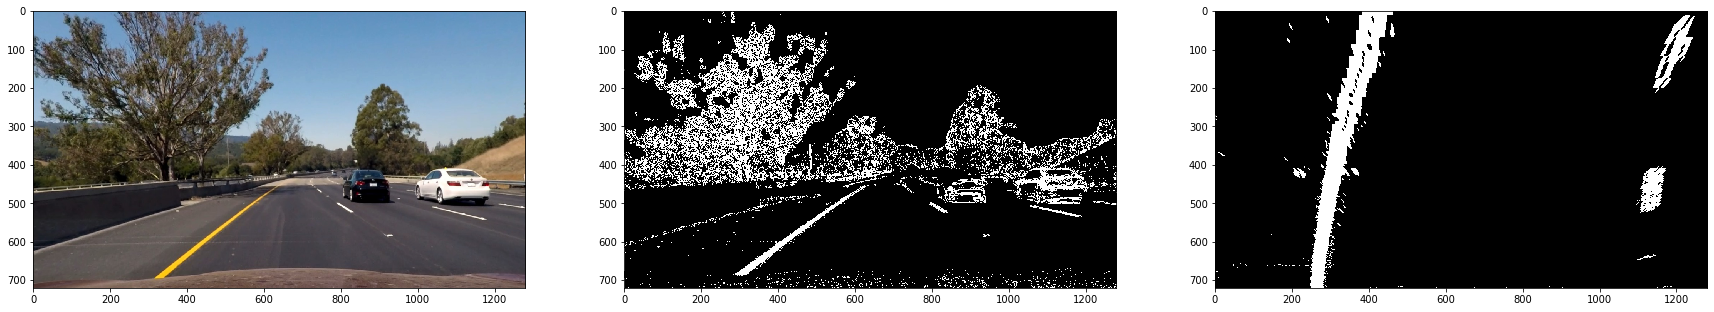

<Figure size 2160x1080 with 0 Axes>

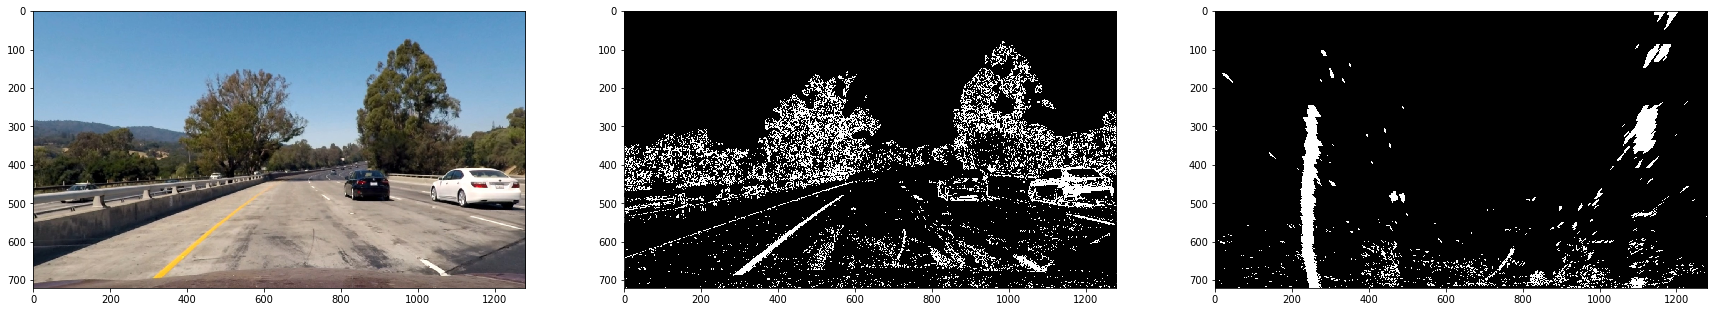

<Figure size 2160x1080 with 0 Axes>

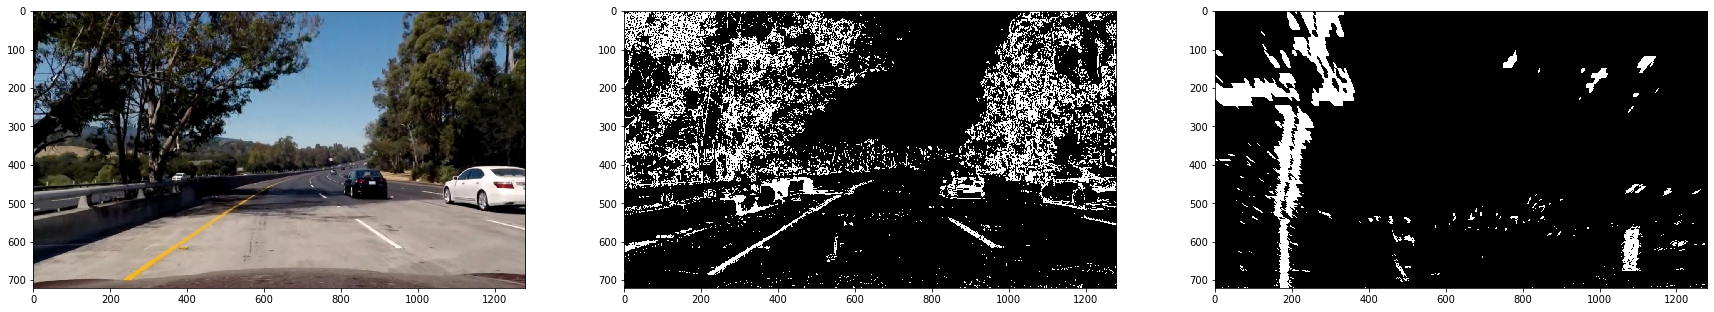

<Figure size 2160x1080 with 0 Axes>

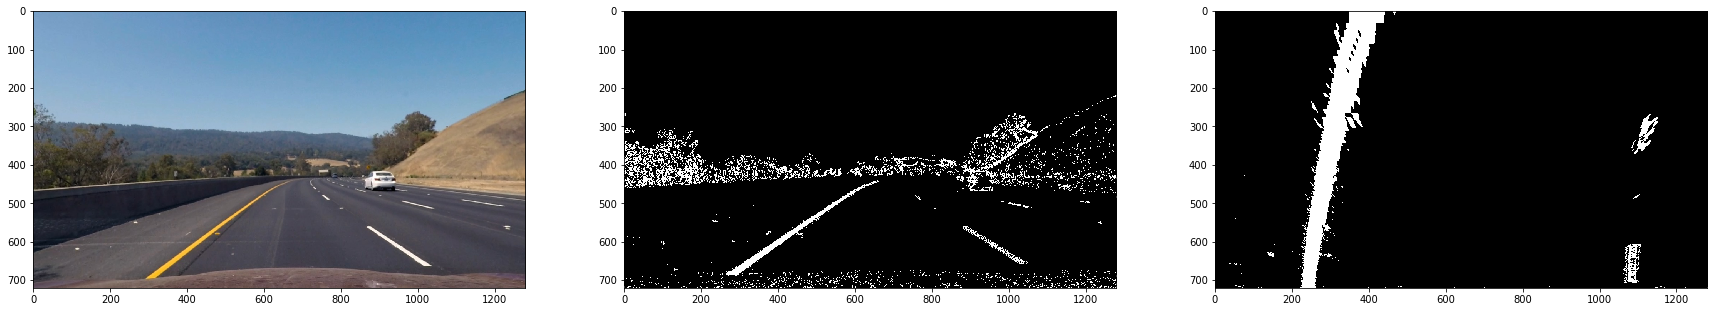

<Figure size 2160x1080 with 0 Axes>

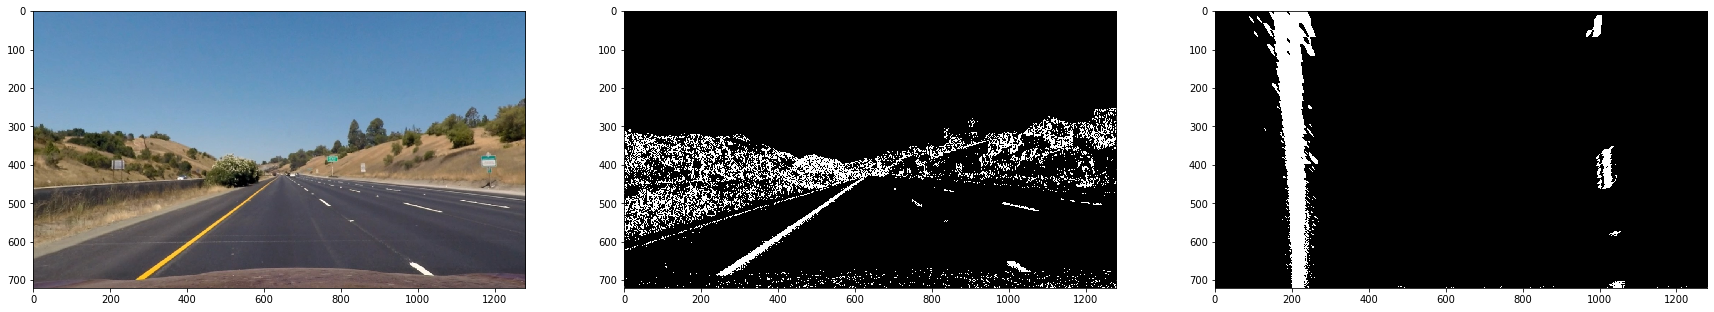

<Figure size 2160x1080 with 0 Axes>

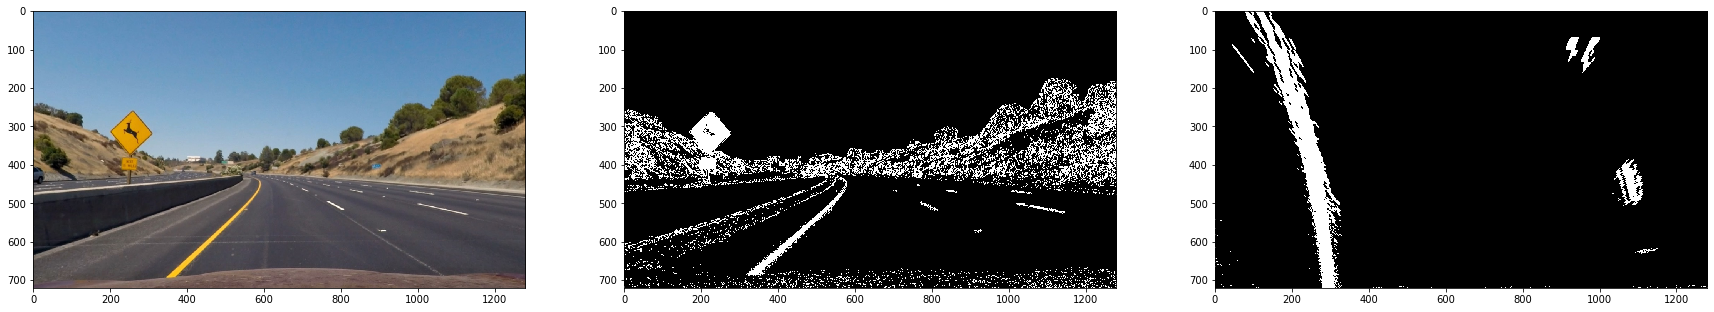

<Figure size 2160x1080 with 0 Axes>

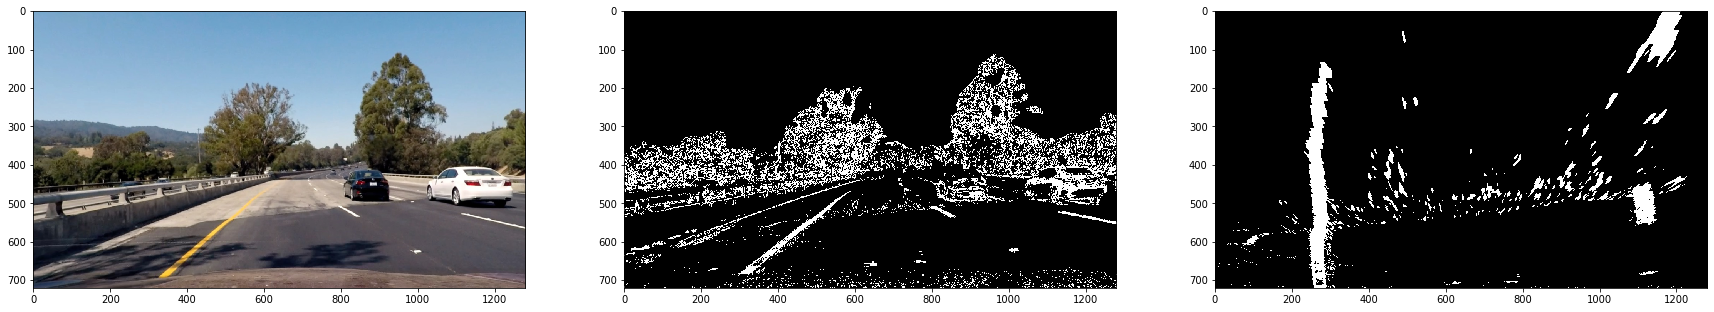

<Figure size 2160x1080 with 0 Axes>

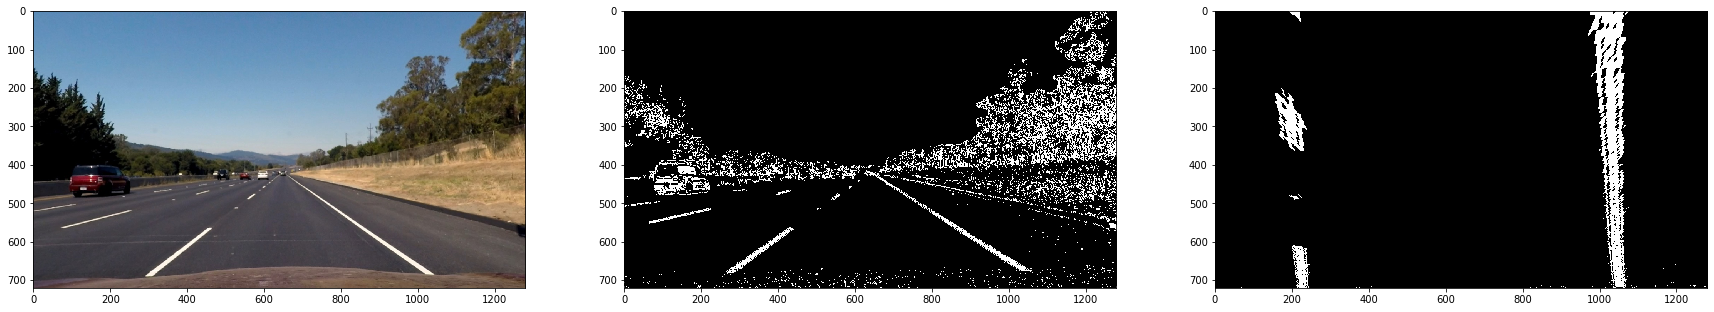

In [7]:
for image in glob.glob("test_images/*.jpg"):
    img = mpimg.imread(image)
    img_rect = undistort_image(img, int_params)
    img_thresh = pipeline(img, s_thresh=(170, 255), sx_thresh=(10, 100))
    img_warped = warp_image(img_thresh, M)
    plt_imlist([img_rect, img_thresh, img_warped])

## Test on challenge video frames

In [ ]:
video = VideoFileClip('test_videos/challenge_video.mp4')
np_frame = video.get_frame(2) # get the frame at t=2 seconds

for i in range(3):
    img = video.get_frame(i*5)
    img_rect = undistort_image(img, int_params)
    img_thresh = pipeline(img, s_thresh=(170, 255), sx_thresh=(10, 100))
    img_warped = warp_image(img_thresh, M)
    
    cv2.imshow('img_rect', img_rect[:,:,::-1])
    cv2.waitKey(0)
    #plt_imlist([img_rect, img_thresh, img_warped])
cv2.destroyAllWindows()